In [ ]:
# all required imports
import matplotlib.pyplot as plt # to plot graphs
import nltk # for performing nlp tasks
import pandas as pd # dealing with tabulated data
import re # regulr expressions for string cleaning

nltk.download('stopwords')

from nltk.corpus import stopwords # get the stopwords
from nltk.stem import PorterStemmer # for stemming
from sklearn.cluster import KMeans # the algorithm to implement
from sklearn.feature_extraction.text import TfidfVectorizer # computing Term Frequency scores
from sklearn import metrics # for model evaluation
from sklearn.metrics import silhouette_score #  determine cluster strength

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df = df.sort_values('ProductId', axis=0, ascending=True, inplace=False, 
                    kind='quicksort', na_position='last') # sort in ascending order
df = df.drop_duplicates(subset={"UserId","ProfileName","Text"}, 
                        keep='first', inplace=False) # remove duplicate rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...


In [ ]:
def score_logic(x):
  """
  function to change scoring,
  any score below 3 will be
  tagged negative others as
  positive
  """

  if x<3:
    return 'negative'
  
  return 'positive'

In [ ]:
# assign labels to scores
actualScore = df['Score']
positiveNegative = actualScore.map(score_logic) 
df['Score'] = positiveNegative

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,positive,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,positive,1210809600,A classic,Get the movie or sound track and sing along wi...
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,positive,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...


In [ ]:
df['Text'][150528]

"In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm."

# Text pre processing

In [ ]:
stemmer = PorterStemmer() # create PorterStemmer object
stopwords = set(stopwords.words('english'))

In [ ]:
def clean_html(text):
  """
  function to clean text from html tags and
  punctuations or special characters
  :param string text: the text with html tags

  return: text without html tags
  """

  cleantext = re.compile('<.*?>') # html tag
  cleantext = re.sub(cleantext, ' ', text)
  return cleantext

def clean_punc(text):

  """
  function to clean text from punctuations 
  or special characters
  :param string text: text to remove punctuations from

  return: text without punctuations
  """

  cleantext = re.sub(r'[\|/|")|(|#]', r'', text) # special characters
  cleantext = re.sub(r'[.|,|?|!]', r' ', cleantext) # punctuations
  return cleantext


In [ ]:
index = 0
final_str = ' '
final_string=[]
positives = []
negatives = []
stemmed_sentence = ''

# text pre-processing

for sent in df['Text'].values:
    filtered_sentence=[]
    sent = clean_html(sent)
    for word in sent.split():
        for cleaned_words in clean_punc(word).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stopwords):
                    stemmed_sentence = (
                        stemmer.stem(cleaned_words.lower())
                        ).encode('utf8')
                    filtered_sentence.append(stemmed_sentence)
                    if(df['Score'].values)[index] == 'positive': 
                        positives.append(stemmed_sentence)
                    if(df['Score'].values)[index] == 'negative':
                        negatives.append(stemmed_sentence)
                else:
                    continue
            else:
                continue 

    final_str = b" ".join(filtered_sentence)
    final_string.append(final_str)
    index += 1

In [ ]:
df['CleanedText'] = final_string # corpus
df['CleanedText'] = df['CleanedText'].str.decode("utf-8")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,positive,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,june saw charm group rose begin droop pep chic...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,positive,1210809600,A classic,Get the movie or sound track and sing along wi...,get movi sound track sing along carol king gre...
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,positive,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,entertain rhyme catchi illustr imagin fit righ...


# Performing clustering

K Means clustering model for inverse term frequency

In [ ]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df['CleanedText'].values) # compute tfidf score

In [ ]:
# plotting elbow curve

wcss = [] 

for i in range(1, 10):
  """
  compute time: 20 min
  """
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit_predict(tfidf)
  wcss.append(kmeans.inertia_)

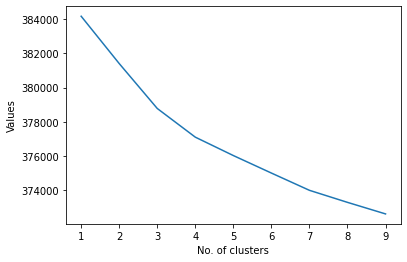

In [ ]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], wcss)
plt.xlabel('No. of clusters')
plt.ylabel('Values')
plt.show()

In [ ]:
# build the ML model

model = KMeans(n_clusters = 7, init = 'k-means++', random_state = 0)
labels = model.fit_predict(tfidf)
print(labels)

[0 0 0 ... 0 1 1]


# Performance Evaluation

In [ ]:
# computing silhouette score

s_score = silhouette_score(tfidf, labels, metric='euclidean')
print(s_score)

0.009725397077106549


## Visualising results

In [ ]:
list_00 = tfidf[labels == 0][:, 0].toarray()[:, 0]
list_01 = tfidf[labels == 0][:, 1].toarray()[:, 0]
list_10 = tfidf[labels == 1][:, 0].toarray()[:, 0]
list_11 = tfidf[labels == 1][:, 1].toarray()[:, 0]

print(len(list_00))
print(len(list_01))
print(len(list_10))
print(len(list_11))

203615
203615
79774
79774


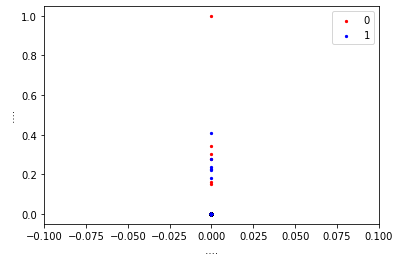

In [ ]:
# scatter plot for cluster correlation 

plt.scatter(list_00, list_01, s = 5, c = 'red', label = '0')
plt.scatter(list_10, list_11, s = 5, c = 'blue', label = '1')
plt.xlim([-0.1, 0.1])
plt.legend() 
plt.show()

In [ ]:
# assign generated labels to corpus

df['Cluster_Label'] = labels
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Cluster_Label
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,positive,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,june saw charm group rose begin droop pep chic...,0
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...,0
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,0
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,positive,1210809600,A classic,Get the movie or sound track and sing along wi...,get movi sound track sing along carol king gre...,0
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,positive,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,entertain rhyme catchi illustr imagin fit righ...,0


In [ ]:
df.groupby(['Cluster_Label'])['Text'].count() # number of points belonging to a cluster

Cluster_Label
0    203615
1     79774
2     30982
3     20247
4     25476
5     24406
6      9147
Name: Text, dtype: int64

In [ ]:
# finding descriptors

print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(7):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :7]:
        print(' %s' % tfidf_vect.get_feature_names()[ind], end='')
        print()

Top terms per cluster:
Cluster 0: use


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 love
 product
 great
 good
 make
 one
Cluster 1: order
 amazon
 price
 product
 store
 find
 ship
Cluster 2: tast
 like
 flavor
 drink
 good
 water
 sugar
Cluster 3: dog
 treat
 food
 love
 chew
 eat
 like
Cluster 4: tea
 green
 flavor
 drink
 tast
 bag
 like
Cluster 5: chocol
 cooki
 tast
 dark
 like
 good
 love
Cluster 6: cat
 food
 eat
 love
 treat
 like
 one


In [ ]:
# sentences in each cluster

for cluster_number in range(7):

  if cluster_number in [0, 1, 3, 5]:
    print("reviews assigned to cluster ", cluster_number)
    print("-" * 50)
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][5]]['Text'])
    print("\n")
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][10]]['Text'])
    print("\n")
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][20]]['Text'])
    print("\n")
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][30]]['Text'])
    print("_"*50)
  
  elif cluster_number == 2:
    print("reviews assigned to cluster ", cluster_number)
    print("-" * 50)
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][0]]['Text'])
    print("\n")
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][5]]['Text'])
    print("\n")
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][10]]['Text'])
    print("_"*50)
  
  elif cluster_number == 6:
    print("reviews assigned to cluster ", cluster_number)
    print("-" * 50)
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][0]]['Text'])
    print("\n")
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][5]]['Text'])
  
  else:
    print("reviews assigned to cluster ", cluster_number)
    print("-" * 50)
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][-1]]['Text'])
    print("\n")
    print(df.iloc[df.groupby(['Cluster_Label']).groups[cluster_number][-5]]['Text'])
    print("_"*50)

reviews assigned to cluster  0
--------------------------------------------------
I have 3 cats...2 could care less..the other one LOVES this so much.  I have it by their food bowls and she nibbles on it every day.  No throwing up like outside grass.


My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.


I was very happy when I received my plant.It was over 6 inches,very healthy with new shoots.I received it in just 3 days from CA to NY.It has already grown over an inch and added two new leaves in a weeks time.Look forward to little bananas:)


I waited several weeks before reviewing this plant because I wanted to see how it would do. I arrived in a small plastic container and had 3 damaged leaves. I replanted it and immediately it began to grow new healthy leaves at at fast rate. Indirect light and watering it about every 10 days has seemed to work perfect. It is a beautiful plant and is growing well. It was packed well but lo